<h1> Análise exploratória sobre reviews </h1>

<h3> Importando bibliotecas </h3>

In [40]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Image


<h3> Importando os dados e tratando para a análise </h3>

<h5> Importando dataset consolidade </h5>

In [41]:
# Importando o dataset tratado

df = pd.read_parquet(r'dados_transformados\dados_transformados.parquet')

<h5> Removendo duplicatas </h5>

In [42]:
# Removendo os order_id repetidos

df = df.drop_duplicates(subset=['order_id', 'order_status'])

<h5> O que consta na base de dados </h5>

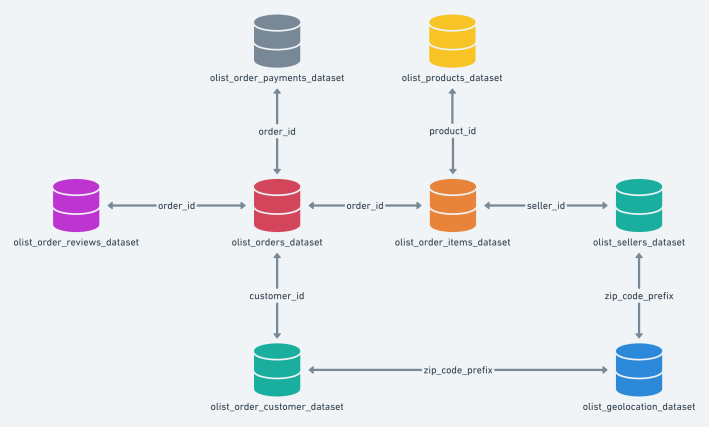

In [43]:
# Relação dos dados da OLIST
Image(filename ="PNG/relacaobd.png")

<h2> Início da análise exploratória e identificação de padrões <h2>

<h4> Verificando o comportamento padrão dos reviews (de 1 a 5) </h4>

In [44]:
# Criando a porcentagem de reviews por cada nota
r5 = len(df[df['review_score'] == 5]) * 100 / len(df)
r4 = len(df[df['review_score'] == 4]) * 100 / len(df)
r3 = len(df[df['review_score'] == 3]) * 100 / len(df)
r2 = len(df[df['review_score'] == 2]) * 100 / len(df)
r1 = len(df[df['review_score'] == 1]) * 100 / len(df)

# Média geral dos reviews
media_geral = df['review_score'].mean()

# Mostrando na tela os resultados de maneira arrendodada
print(len(df), 'Reviews no total')
print(f'nota 5: {r5:.1f}%')
print(f'nota 4: {r4:.1f}%')
print(f'nota 3: {r3:.1f}%')
print(f'nota 2: {r2:.1f}%')
print(f'nota 1: {r1:.1f}%')
print(f'média geral: {media_geral:.1f}')

99441 Reviews no total
nota 5: 57.3%
nota 4: 19.2%
nota 3: 8.2%
nota 2: 3.2%
nota 1: 11.4%
média geral: 4.1


In [45]:
#Criando paleta de cores seaborn
sns.set()

# Definindo cores
COLOR_r5 = '#DD7A30'
COLOR_r4 = '#891E5A'
COLOR_r3 = '#3C62CE'
COLOR_r2 = '#4FAB4E'
COLOR_r1 = '#4F47B2'
REVIEWS_PALETTE = sns.color_palette((COLOR_r1, COLOR_r2, COLOR_r3, COLOR_r4, COLOR_r5))

# Fundo claro para facilitar a visualização
sns.set_style('darkgrid', {'axes.facecolor': '#eeeeee'})

# Tamanho padrão
resize_plot = lambda: plt.gcf().set_size_inches(12, 5)

<h4> Resultado visual da distribuição de reviews: </h4>

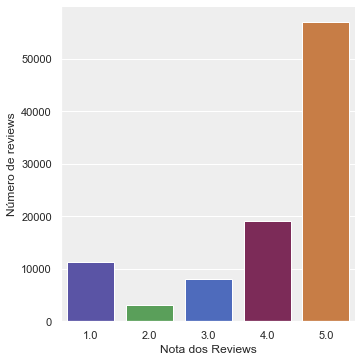

In [46]:
# Plotando gráfico de reviews
sns.catplot(
    x='review_score', 
    kind='count', 
    data=df, 
    palette=REVIEWS_PALETTE
).set(
    xlabel='Nota dos Reviews', 
    ylabel='Número de reviews',
)

<b>Insights:</b>
1. Notas 1 aparecem mais que notas 2 e 3 somadas
2. A maior parte de reviews é de nota 5

<h4> Distribuição de notas por categoria de produto </h4>

- É possível notar que móveis de escritório apresentam mais notas negativas do que a média geral e merece uma análise mais aprofundada

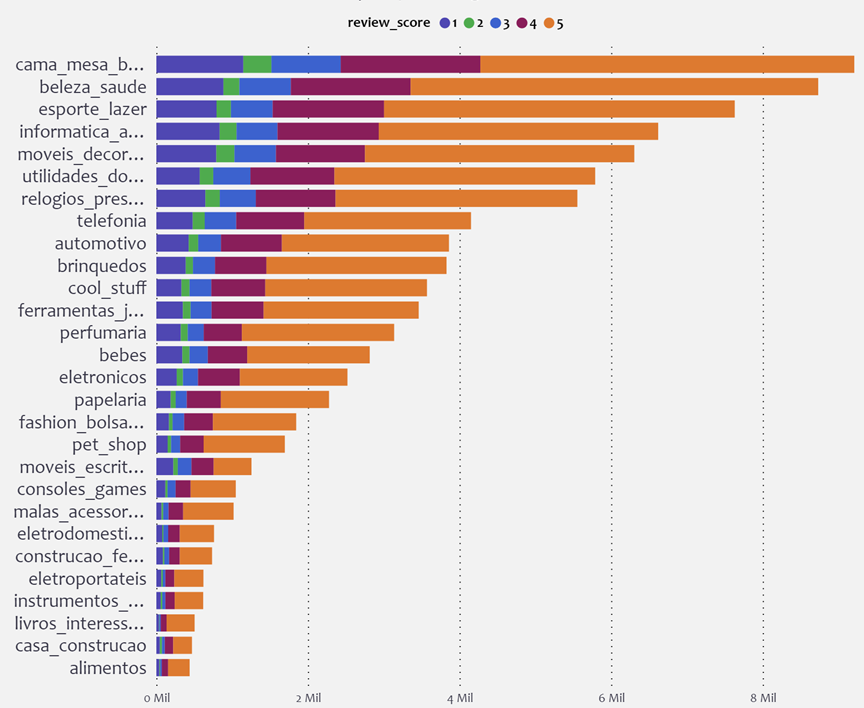

In [47]:
#Imagem
Image(filename ="PNG/avaliacoes_por_categoria.png")

<h2> Análise mais aprofundada da categoria que chamou atenção: móveis de escritório </h2>

In [48]:
# Filtrando os dados por móveis de escritório
df_moveis = df['product_category_name']=='moveis_escritorio'

In [49]:
# Filtrando os dados por móveis de escritório
df_moveis = df[df_moveis]

<h4> Resultado visual da distribuição de reviews na categoria móveis de escritório: </h4>

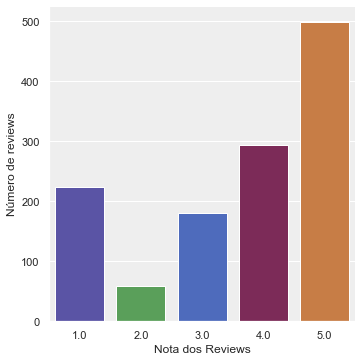

In [50]:
# Plotando gráfico
sns.catplot(
    x='review_score', 
    kind='count', 
    data=df_moveis, 
    palette=REVIEWS_PALETTE
).set(
    xlabel='Nota dos Reviews', 
    ylabel='Número de reviews',
)

<b>Insights:</b>
1. Notas 1 aparece com uma proporção muito maior do que a  vista na média geral

Distribuição dos reviews no setor de móveis de escritório:

In [51]:
# Criando a porcentagem de reviews por cada nota
r5 = len(df_moveis[df_moveis['review_score'] == 5]) * 100 / len(df_moveis)
r4 = len(df_moveis[df_moveis['review_score'] == 4]) * 100 / len(df_moveis)
r3 = len(df_moveis[df_moveis['review_score'] == 3]) * 100 / len(df_moveis)
r2 = len(df_moveis[df_moveis['review_score'] == 2]) * 100 / len(df_moveis)
r1 = len(df_moveis[df_moveis['review_score'] == 1]) * 100 / len(df_moveis)

# Média geral dos reviews
media_moveis_escritorio = df_moveis['review_score'].mean()

# Mostrando na tela os resultados de maneira arrendodada
print(len(df_moveis), 'Reviews no total')
print(f'nota 5: {r5:.1f}%')
print(f'nota 4: {r4:.1f}%')
print(f'nota 3: {r3:.1f}%')
print(f'nota 2: {r2:.1f}%')
print(f'nota 1: {r1:.1f}%')
print(f'média geral: {media_moveis_escritorio:.1f}')

1265 Reviews no total
nota 5: 39.4%
nota 4: 23.2%
nota 3: 14.2%
nota 2: 4.7%
nota 1: 17.7%
média geral: 3.6


<h4> Tabela comparativa de comportamento dos reviews gerais x móveis de escrítório </h4>

| Reviews | Vendas em geral | Móveis de escritório
|--- | :---: | :---: |
| Nota 1 | 11,4% | 17,7% |
| Nota 2 | 3,2% | 4,7% |
| Nota 3 | 8,2% | 14,2% |
| Nota 4 | 19,2% | 23,2%|
| Nota 5 | 57,3% | 39,4% |

<h4> Diferenças do geral em números </h4>

- A porcentagem de notas 1  são de 17,7%, valor maior que a média geral de 11,4%
- A porcentagem de notas 5  são de 39,4%, valor menor que a média geral de 57,3% (quase 20% abaixo da média)
- A média geral caiu 0.5 nesse recorte

Diante disso, será realizada uma análise exploratória pelo setor de móveis de escritório

In [52]:
# Criando filtro para contar quanto cada estado vendeu de móveis de escritório
saida_UF_movel = df_moveis.groupby(['seller_state']).count()


In [53]:
# Criando o dataframe na mão pois deu erro de index
UF_moveis = pd.DataFrame({'UF': ['MG', 'PR', 'RJ', 'RS', 'SC', 'SP'],
                   'moveis_vendidos': [6, 28, 13, 1, 8, 1209]})

<h2> Análise exploratória do setor de móveis de escritório </h2>

Distribuição da origem (venda) dos produtos deste seguimento

In [54]:
# Expondo o os móveis vendidos por UF
UF_moveis

,UF,moveis_vendidos
0,MG,6
1,PR,28
2,RJ,13
3,RS,1
4,SC,8
5,SP,1209


Como é possível perceber, a maior parte dos móveis de escritório partem de SP

A participação de cada estado nas vendas é de:
- MG: 0,5%
- PR: 2,2%
- RJ: 1,0%
- RS: 0,08%
- SC: 0,6%
- SP: 95,6%

Além disso, existem 585 comentários para o setor de móveis de escritório, sendo 575 no estado de São Paulo. Diante disso a análise da saída dos produtos se concentrará em SP por ser representativa e fará mais sentido posteriomente junto com a análise de sentimentos

<h3> Comportamento da venda de móveis de escritório no estado de São Paulo </h3>

In [55]:
# Filtrando para ter acesso somente aos dados de vendas de móveis de escritório em SP
df_SP = (df['seller_state']=='SP') & (df['product_category_name'] == 'moveis_escritorio')


In [56]:
# Aplicando o filtro e testando a saída
df_venda_sp = df[df_SP]
df_venda_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 11 to 119083
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       1209 non-null   object 
 1   customer_id                    1209 non-null   object 
 2   order_status                   1209 non-null   object 
 3   order_purchase_timestamp       1209 non-null   object 
 4   order_approved_at              1209 non-null   object 
 5   order_delivered_carrier_date   1204 non-null   object 
 6   order_delivered_customer_date  1194 non-null   object 
 7   order_estimated_delivery_date  1209 non-null   object 
 8   order_item_id                  1209 non-null   float64
 9   product_id                     1209 non-null   object 
 10  seller_id                      1209 non-null   object 
 11  shipping_limit_date            1209 non-null   object 
 12  price                          1209 non-null 

<h4> Distribuição da origem dos produtos por cidade no estado de SP </h4>

In [57]:
# Fazendo contagem de vendas por cidade de SP
cidades_venda = df_venda_sp.groupby(['seller_city']).count()
cidades_venda.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
seller_city,,,,,,,,,,,,,,,,,,,,,
araraquara,3,3,3,3,3,3,3,3,3,3,...,3,3,0,2,3,3,3,3,3,3
bady bassitt,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
guarulhos,11,11,11,11,11,10,10,11,11,11,...,11,11,6,8,11,11,11,11,11,11
itaquaquecetuba,1002,1002,1002,1002,1002,999,991,1002,1002,1002,...,995,995,102,496,995,995,1002,1002,1002,1002
lencois paulista,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mogi guacu,121,121,121,121,121,121,120,121,121,121,...,119,119,21,51,119,119,121,121,121,121
osasco,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
pinhais,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
portoferreira,1,1,1,1,1,0,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1


Como é possível perceber, a maior parte dos móveis de escritório partem de Itaquequecetuba e Mogi Guaçu:

A partipação de cada cidade nas vendas de móveis de escritório em SP é de:

- araraquara: 0.2%
- bady bassitt: 0.1%
- guarulhos: 0.9%
- itaquaquecetuba: 82.9%
- lencois paulista: 0.1%
- mogi guacu: 10.0%
- osasco: 0.2%
- pinhais: 0.1%
- portoferreira: 0.1%
- s jose do rio preto: 0.4%
- salto: 1.4%
- santo andre: 0.6%
- sao bernardo do campo: 2.2%
- sao paulo: 0.9%

Analisando essas informações graficamente é possível notar que a cidade que há uma cidade específica que puxa a média de vendas de móveis para baixo

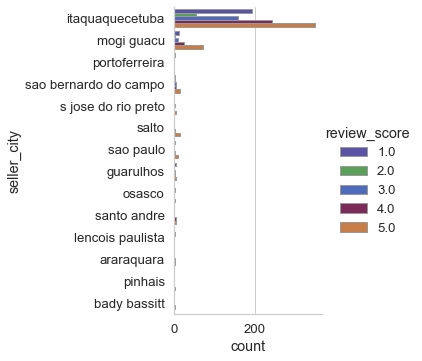

In [58]:
# Plotando gráfico de distribuição de reviews no estado de SP
sns.set(style="whitegrid", font_scale=1.2)
sns.catplot(y="seller_city", hue="review_score", kind="count",
            palette=REVIEWS_PALETTE, edgecolor=".6",
            data=df_venda_sp)


Distribuição das notas por cidade de em números:

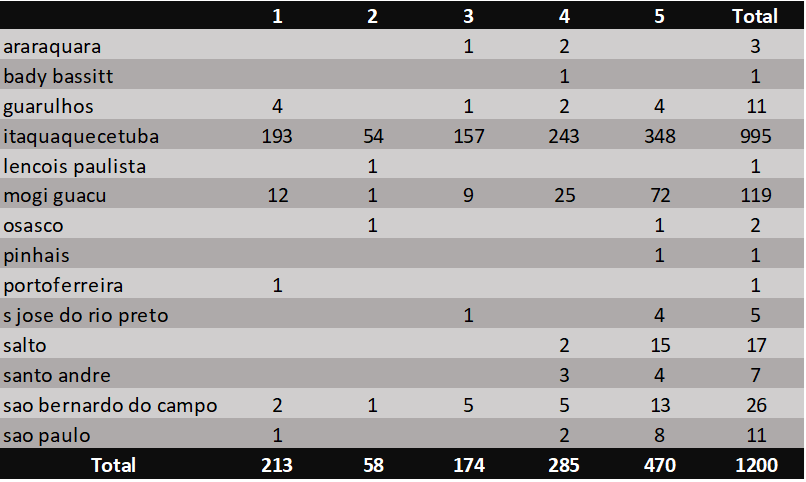

In [59]:
Image(filename ="PNG\cidades_review_score3.PNG")

Com isso é possível concluir que o alto índice de reviews baixos estão concentrados na cidade de Itaquaquecetuba e por isso a análise agora se aprofundará em apenas uma cidade.

<h2> Análise exploratória do setor móveis de escritório na cidade de Itaquaquecetuba </h2>

>Antes de se aprofundar nos dados da cidade resolvemos investigar uma possível explicação para uma concentração tão grande de vendas de móveis de escritório, afinal a cidade é responsável cerca de 79% do total de vendas em todo o país

>Em rápida pesquisa foi possível descobrir a vocação industrial por causa de sua localização geográfica: pelo município, passam rodovias como a SP-66, SP-56, SP-88 e a Rodovia Ayrton Senna, que liga o município a cidades como Mogi das Cruzes, Poá, Suzano, Ferraz de Vasconcelos e Arujá. O município também faz divisa com outros grandes centros urbanos, como a capital estadual e Guarulhos.

In [60]:
# filtro para Itaquaquecetuba
df_itaqua = (df['seller_city'] == 'itaquaquecetuba')

In [61]:
# Aplicando o filtro
itaquafiltro = df[df_itaqua]

<h4> Aplicando filtro para analisar se a cidade possui forte vendas em algum outro setor </h4>
<h5> É possível notar que os outros setores não chegam a 10% das vendas do setor de móveis </h5>

In [62]:
# aplicando filtro para ver o comportamento da cidade em vendas
itaqua = itaquafiltro.groupby(['product_category_name']).count()
itaqua.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
product_category_name,,,,,,,,,,,,,,,,,,,,,
automotivo,88,88,88,88,88,88,87,88,88,88,...,87,87,17,50,87,87,88,88,88,88
bebes,3,3,3,3,3,3,3,3,3,3,...,3,3,0,1,3,3,3,3,3,3
beleza_saude,11,11,11,11,11,9,9,11,11,11,...,11,11,5,5,11,11,11,11,11,11
esporte_lazer,15,15,15,15,15,15,15,15,15,15,...,14,14,4,8,14,14,15,15,15,15
fashion_bolsas_e_acessorios,18,18,18,18,18,18,18,18,18,18,...,18,18,0,5,18,18,18,18,18,18
malas_acessorios,3,3,3,3,3,3,3,3,3,3,...,3,3,0,1,3,3,3,3,3,3
moveis_cozinha_area_de_servico_jantar_e_jardim,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
moveis_decoracao,70,70,70,70,70,70,70,70,70,70,...,70,70,5,39,70,70,70,70,70,70
moveis_escritorio,1002,1002,1002,1002,1002,999,991,1002,1002,1002,...,995,995,102,496,995,995,1002,1002,1002,1002


<h2> Análise sobre os vendedores do setor de móveis de escritório em Itaquaquecetuba

In [63]:
# Aplicando filtro com dados apenas de Itaquaquecetuba
df1 = itaquafiltro[['order_id', 'seller_id', 'seller_zip_code_prefix', 'review_score','product_category_name']]

In [64]:
# Criando filtro
filtromoveis = df1['product_category_name'] == 'moveis_escritorio'

In [65]:
# Aplicando o filtro
df2 = df1[filtromoveis]

In [66]:
# Removendo sellers_id repetidos
df3 = df2.drop_duplicates(subset=['seller_id'])

<h4> É possível notas que há apenas 4 vendedores de móveis na cidade e que 3 deles possuem o mesmo prefixo de zip code </h4>

In [67]:
# Verificando número de vendedores
df3

,order_id,seller_id,seller_zip_code_prefix,review_score,product_category_name
11,e69bfb5eb88e0ed6a785585b27e16dbf,7c67e1448b00f6e969d365cea6b010ab,8577.0,5.0,moveis_escritorio
757,f86b24a45dc34d1b7fcdeb817bf503da,a7f13822ceb966b076af67121f87b063,8577.0,5.0,moveis_escritorio
2315,ab46b23c27822b224f0e2fcca0f25e63,5058e8c1e82653974541e83690655b4a,8583.0,1.0,moveis_escritorio
13118,cd383d7a5f926abfe7b2ee1b80078b45,38874e327ce94d11390b96eb42d61928,8577.0,5.0,moveis_escritorio


<h4> Quantidade de vendas de móveis de escritório por vendedor </h4>

- É possível notar que apenas 45 das 1002 vendas foram no zip code 8583

In [68]:
# Quantidade de vendas por vendedor
df4 = df2.groupby(['seller_id']).count()
df4

,order_id,seller_zip_code_prefix,review_score,product_category_name
seller_id,,,,
38874e327ce94d11390b96eb42d61928,6,6,6,6
5058e8c1e82653974541e83690655b4a,45,45,44,45
7c67e1448b00f6e969d365cea6b010ab,882,882,877,882
a7f13822ceb966b076af67121f87b063,69,69,68,69


><h4> A alta concentração de venda em um mesmo local pode sugerir que pode haver uma espécie de polo moveleiro ou até mesmo fusão de empresas par impulsionar as vendas, porém como o zip code não está completo é impossível estimar com precisão essa informação </h4>

><h4> Foi verificado o dataset geolocation e há 212 combinações de longitude e latitude para os prefixos dos vendedores </h4>

<h4> A distribuição dessas lat e long na cidade de Itaquaquetecetuba aparecem da seguinte maneira: </h4>

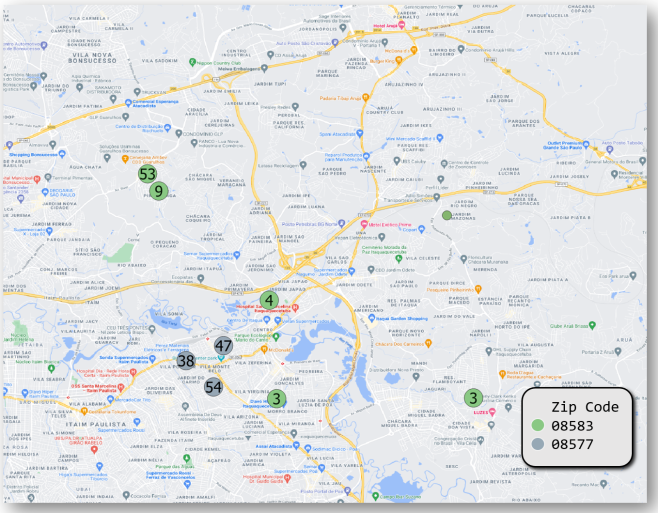

In [69]:
# Imagem
Image(filename ="PNG/zip_code_prefix.PNG")

<h4> Apesar de haver bons insights na localização, outra imprecisão nos dados tornam difícil a análise geoespacial </h4>

> <h4> Existem 8 lag e long relativos ao zip code 8533 que estão longe da maior concentração. Resolvemos investigar no Google Maps e aparentemente eles estão com dados imprecisos </h4>

<h4> Abaixo segue o mapa da região do zip code 8577 que converge com as lat e long </h4>

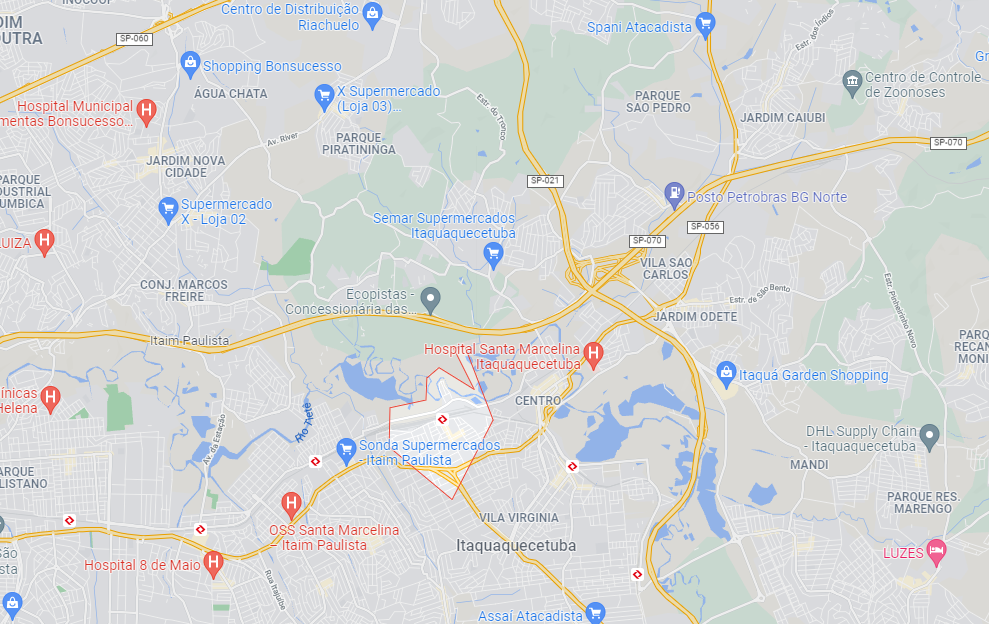

In [70]:
# Imagem
Image(filename ="PNG/8577.PNG")

<h4> E aqui a área em que, teoricamente, todas as localizações do zip code 8583 deveriam estar </h4>

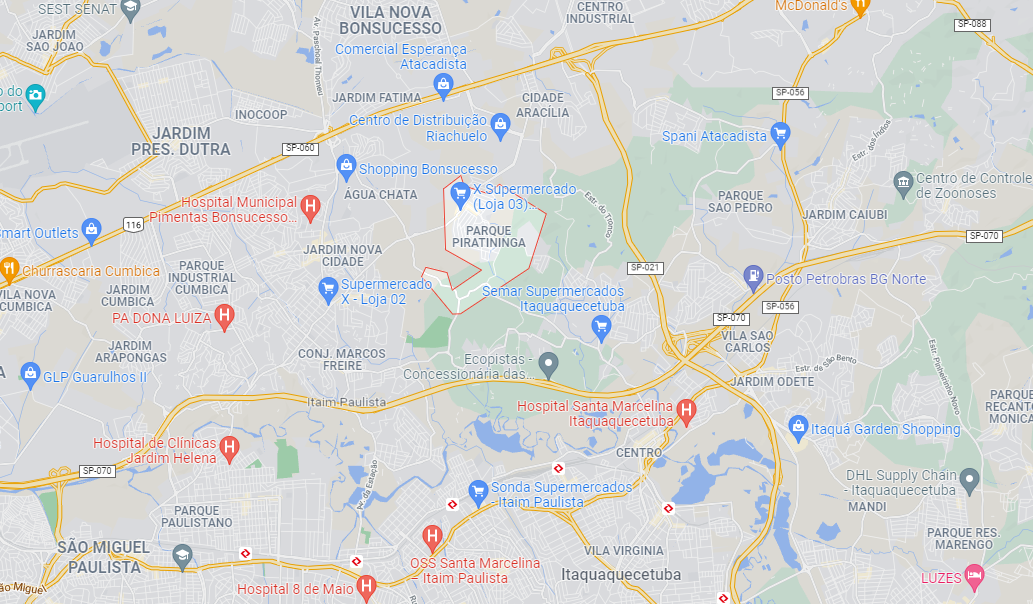

In [71]:
# Imagem
Image(filename ="PNG/8583.PNG")

<h3> A análise exploratória se encerra por aqui e as informações adicionais da análise do setor de imóveis ocorrerá por meio de uma análise de sentimentos aplicadas em machine learning <h3>

Materiais consultados como apoio:

[Stack](http://www.stacktecnologias.com.br/) 

[Camilla Fonseca - Kaggle](https://www.kaggle.com/camillafonseca/nlp-an-lise-de-sentimento-do-olist-para-iniciantes/notebook)

[Leandro Alencar - Kaggle](https://www.kaggle.com/leandroal/nlp-olist)

[Thiago Panini - Kaggle](https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp/notebook)
